# Morfolojik Operatörler OpenCV Kütüphanesi ile Uygulama

## OpenCV (Open Source Computer Vision Library)

OpenCV, gerçek zamanlı bilgisayar görüsü uygulamalarında kullanılan açık kaynaklı bir kütüphanedir.

### Özellikler

- Aslen **C++** diliyle yazılmıştır.
- **Python**, **Java** ve **MATLAB** için de bağları bulunmaktadır.

### Python-OpenCV

Python-OpenCV, orijinal **C/C++** kodunun etrafındaki bir **sarmalayıcı (wrapper)**dır.
Bu nedenle, OpenCV'de Python'dan bir fonksiyon çağrıldığında, gerçekte **C/C++ kaynağı** çalıştırılmaktadır.


* Python `OpenCV` Kütüphanesinin kurulumu;

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

print(cv2.__version__)

4.11.0


## OpenCV ile Görüntü Okuma

`cv2.IMREAD` fonksiyonu, bir görüntüyü okuyup **NumPy array** olarak kaydeder.

### Okuma Modları

- `cv2.IMREAD_UNCHANGED (-1)`: Görüntüyü orijinal haliyle okur (şeffaflık dahil).
- `cv2.IMREAD_GRAYSCALE (0)`: Görüntüyü gri tonlamalı (siyah-beyaz) okur.
- `cv2.IMREAD_COLOR (1)`: Görüntüyü renkli okur (şeffaflık ihmal edilir).

**Not:** Varsayılan olarak `cv2.IMREAD_COLOR` kullanılır. Bu nedenle, şeffaflık içeren bir PNG dosyası okunsa bile şeffaflık kanalı göz ardı edilir.

### OpenCV'de Renk Formatı

OpenCV, renkli görüntüleri **BGR (Blue, Green, Red)** formatında okur.
Yani, standart **RGB (Red, Green, Blue)** yerine mavi bileşeni önce gelir.

In [2]:
I = cv2.imread('./images/peppers.png', cv2.IMREAD_UNCHANGED)  # I = cv2.imread('./images/peppers.png', -1)

In [3]:
print("Image Properties peppers.png")
print("Type: ", type(I))
print("Dimension: ", I.ndim)
print("Number of Pixels: ", I.size)
print("Shape: ", I.shape)
print("Data Type: ", I.dtype)

Image Properties peppers.png
Type:  <class 'numpy.ndarray'>
Dimension:  3
Number of Pixels:  589824
Shape:  (384, 512, 3)
Data Type:  uint8


In [4]:
I2 = cv2.imread('./images/peppers.png', cv2.IMREAD_GRAYSCALE)  # I = cv2.imread('./images/peppers.png', 0)

In [5]:
print("Image Properties peppers.png (cv2.IMREAD_GRAYSCALE)")
print("Type: ", type(I2))
print("Dimension: ", I2.ndim)
print("Number of Pixels: ", I2.size)
print("Shape: ", I2.shape)
print("Data Type: ", I2.dtype)

Image Properties peppers.png (cv2.IMREAD_GRAYSCALE)
Type:  <class 'numpy.ndarray'>
Dimension:  2
Number of Pixels:  196608
Shape:  (384, 512)
Data Type:  uint8


### Gri ve Renkli Görüntülerin Matris Yapısı

- **Gri görüntülerin matris boyutu 2D'dir**, çünkü her piksel yalnızca tek bir parlaklık değeri içerir (0-255 arası bir gri ton değeri).
- **Renkli görüntüler ise 3D bir matris yapısına sahiptir**, çünkü her piksel **üç kanal içerir**: **Kırmızı (Red), Yeşil (Green) ve Mavi (Blue)**.

#### RGB Renk Uzayı

RGB renk uzayı, **üç ayrı renk kanalından (R, G, B) oluşur**.
Her piksel bu üç değeri içerdiğinde tam renkli bir görüntü oluşur.

In [6]:
I3 = cv2.imread('./images/peppers.png', cv2.IMREAD_COLOR)  # I = cv2.imread('./images/peppers.png', 1)

In [7]:
print("Image Properties peppers.png (cv2.IMREAD_COLOR)")
print("Type: ", type(I2))
print("Dimension: ", I3.ndim)
print("Number of Pixels: ", I3.size)
print("Shape: ", I3.shape)
print("Data Type: ", I3.dtype)

Image Properties peppers.png (cv2.IMREAD_COLOR)
Type:  <class 'numpy.ndarray'>
Dimension:  3
Number of Pixels:  589824
Shape:  (384, 512, 3)
Data Type:  uint8


In [8]:
I_copy = I.copy()  # Görüntünün kopyasını alma

print("Image Properties peppers.png (I.copy())")
print("Type: ", type(I_copy))
print("Dimension: ", I_copy.ndim)
print("Number of Pixels: ", I_copy.size)
print("Shape: ", I_copy.shape)
print("Data Type: ", I_copy.dtype)

Image Properties peppers.png (I.copy())
Type:  <class 'numpy.ndarray'>
Dimension:  3
Number of Pixels:  589824
Shape:  (384, 512, 3)
Data Type:  uint8


### Görüntü Boyutları ve NumPy Dizileri

Bir görüntünün boyutu **(1920, 1080)** olarak verildiğinde:
- **1920 sütun** ve **1080 satır** içerdiği anlamına gelir.
- Yani, **(genişlik, yükseklik) → (widht, height)** olarak ifade edilir.

#### NumPy Dizilerinde Boyutlar

- Bir **2D NumPy dizisinin ilk boyutu**, dizinin **satırlarını** temsil eder.
- Burada her satır, görüntünün **yüksekliğini (height)** belirtir.

Özetle, bir görüntü **(yükseklik, genişlik) = (y, x)** şeklinde tanımlanır.


## Görüntü Gösterme

In [9]:
cv2.imshow("Image Properties peppers.png", I)
cv2.imshow("Image Properties peppers.png (cv2.IMREAD_GRAYSCALE)", I2)
cv2.imshow("Image Properties peppers.png (cv2.IMREAD_COLOR)", I3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Görüntü gösterme (Matplotlib Kullanarak)
* OpenCV'de renkli görüntüler **BGR (Blue, Green, Red)** şeklinde okunur.
* Matplotlib, **RGB (Red, Green, Blue)** modunda görüntüler.

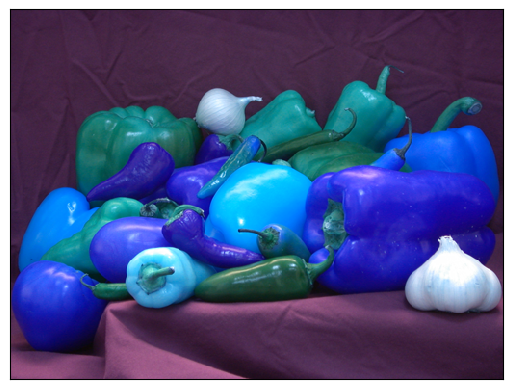

In [10]:
plt.figure()
plt.title('Image Peppers Orj')
plt.imshow(I)
plt.close()

plt.xticks([]), plt.yticks([])  # eksenleri kaldırır

# Gri tonlu veya binary görüntüleri göstermek için aşağıdaki kodlar kullanılabilir.
plt.imshow(I, cmap='Greys', interpolation='nearest')

## Görüntüde Piksel Değerlerine Erişim

In [11]:
px = I[50, 50, :]
px_blue = I[50, 50, 0]
print(px)
print(px_blue)

[71 39 66]
71


In [12]:
cv2.imshow("Image Peppers Orj", I)

for i in range(50):
    for j in range(50):
        I_copy[i, j] = [255, 255, 255]

cv2.imshow('Image Peppers with white area', I_copy)

for i in range(51, 101):
    for j in range(50):
        I_copy[i, j] = [0, 0, 0]

cv2.imshow('Image Peppers with black and white area', I_copy)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Görüntünün Boyutlarını Ayırma (RGB Görüntü Yeniden Oluşturma)

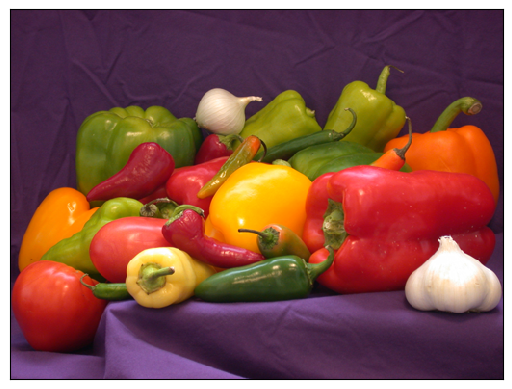

In [13]:
I_new = np.zeros((384, 512, 3), dtype=np.uint8)

I_r = I[:, :, 2]
I_g = I[:, :, 1]
I_b = I[:, :, 0]
I_new[:, :, 0] = I_r
I_new[:, :, 1] = I_g
I_new[:, :, 2] = I_b

cv2.imshow('Convert BGR Image to RGB Image', I_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(I_new, cmap='Greys', interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
I_b, I_g, I_r = cv2.split(I)  # Resim renk kanallarına ayrıştırılıyor.
I_rgb = cv2.merge([I_r, I_g, I_b])  # Resim yeniden oluşturuluyor.
cv2.imshow("Convert BGR Image to RGB Image whit cv2.split() function and cv2.merge() .", I_rgb)

I2_rgb = I[:, :, ::-1]  # BGR’ı RGB ye dönüştürür
cv2.imshow("Convert BGR Image to RGB Image whit revers array.", I2_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()


## Renk Dönüşümü


### Gri Renk Dönüşümünün Formülü;
* $Gray= 0.2989R + 0.5870G + 0.1140B$

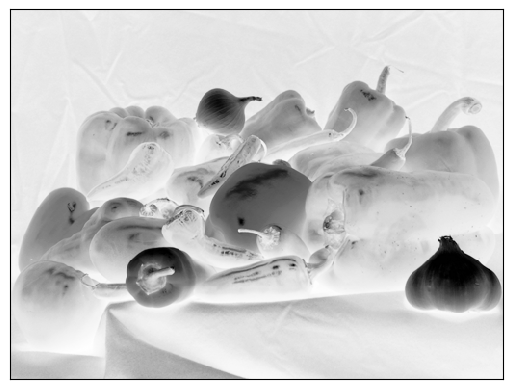

In [15]:
I2 = cv2.cvtColor(I_rgb, cv2.COLOR_RGB2GRAY)
cv2.imshow('image Gray', I2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(I2, cmap='Greys', interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()

### RGB Renk Dönüşümü

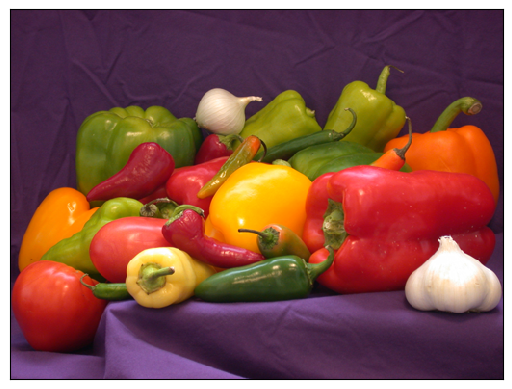

In [16]:
I2 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
cv2.imshow('image RGB', I2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(I2, cmap='Greys', interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()

### HSV Renk Dönüşümü
HSV renk alanı aşağıdaki üç bileşene sahiptir;
* H – Ton (Baskın Dalga Boyu) - Hue (Dominant Wavelength)
* S – Doygunluk (Renk saflığı/tonları) - Saturation (Purity/shades of the color)
* V – Değer (Yoğunluk) - Value (Intensity)

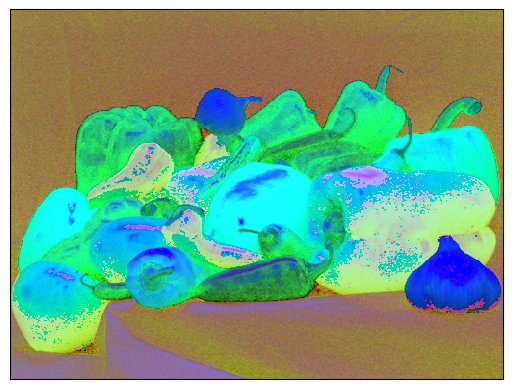

In [17]:
I2 = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
cv2.imshow('image HSV', I2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(I2, cmap='Greys', interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()

## Görüntü Kaydetme

In [18]:
cv2.imwrite('./images/peppers_new.tif', I2)

True

## OpenCV Çizim İşlemleri

### Çizgi Çizme
* Syntax: line(image, start_point, end_point,
color, thickness)

In [19]:
imageLine = I.copy()
pointA = (200, 80)
pointB = (450, 80)
cv2.line(imageLine, pointA, pointB, (255, 255, 0), thickness=3)
cv2.imshow('Image Line', imageLine)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Çember Çizme
* Syntax: circle(image, center_coordinates,
radius, color, thickness)

In [20]:
imageCircle = I.copy()
circle_center = (415, 190)
radius = 100
cv2.circle(imageCircle, circle_center, radius, (0, 0, 255), thickness=3,
           lineType=cv2.LINE_AA)
cv2.imshow("Image Circle", imageCircle)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Dikdörtgen Çizme
* Syntax: rectangle(image, start_point, end_point, color, thickness)

In [21]:
imageRectangle = I.copy()
startPoint = (200, 80)
endPoint = (450, 300)
cv2.rectangle(imageRectangle, startPoint, endPoint, (255, 255, 0), thickness=3)
cv2.imshow("Image Rectangle", imageRectangle)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Elips Çizme
* Syntax: ellipse(image, centerCoordinates, axesLength, angle,
startAngle, endAngle, color, thickness)

In [22]:
imageEllipse = I.copy()
centerCoordinate = (250, 200)
angle = 90
axesLength = (150, 75)
startAngle = 0
endAngle = 360
color = (255, 0, 1)

imageEllipse = cv2.ellipse(imageEllipse, centerCoordinate, axesLength, angle, startAngle, endAngle, color, thickness=3)
cv2.imshow("Image Ellipse", imageEllipse)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Metin Ekleme
* Syntax: putText(image, text, org, font,
fontScale, color)

In [23]:
imageText = I.copy()
text = "TURENG!!!"
org = (10, 256)
font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
fontScale = 3
color = (255, 0, 230)

imageText = cv2.putText(imageText, text, org, font, fontScale, color)
cv2.imshow("Image Text", imageText)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Morfolojik Operatörler ve Python Uygulamaları

### Eroding (Aşınma)

In [24]:
Image = cv2.imread("./images/fig1.jpg")
StructuringElement = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
StructuringElement2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
StructuringElement3 = np.ones((40, 40), np.uint8)


erosion = cv2.erode(Image, StructuringElement)
erosion2 = cv2.erode(Image, StructuringElement2)
erosion3 = cv2.erode(Image, StructuringElement3)

cv2.imshow("Image Original", Image)
cv2.imshow("Image Erosion", erosion)
cv2.imshow("Image Erosion 2", erosion2)
cv2.imshow("Image Erosion 3 whit structuring element of np array.", erosion3)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Dilating (Genişleme)

In [25]:
Image = cv2.imread("./images/fig1.jpg")
StructuringElement = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
StructuringElement2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
StructuringElement3 = np.ones((40, 40), np.uint8)

dilation = cv2.dilate(Image, StructuringElement)
dilation2 = cv2.dilate(Image, StructuringElement2)
dilation3 = cv2.dilate(Image, StructuringElement3)

cv2.imshow("Image Original", Image)
cv2.imshow("Image Dilation", dilation)
cv2.imshow("Image Dilation 2", dilation2)
cv2.imshow("Image Dilation 3 whit structuring element of np array.", dilation3)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Opening (Açma)

In [26]:
Image = cv2.imread("./images/fig1.jpg")
StructuringElement = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

open = cv2.morphologyEx(Image, cv2.MORPH_OPEN, StructuringElement)

cv2.imshow("Image Original", Image)
cv2.imshow("Image Open", open)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Closing (Kapama)

In [29]:
Image = cv2.imread("./images/fig1.jpg")
StructuringElement = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

close = cv2.morphologyEx(Image, cv2.MORPH_CLOSE, StructuringElement)

cv2.imshow("Image Original", Image)
cv2.imshow("Image Close", close)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ÖDEV
* Aşağıda soldaki (frozen_rose.png) orijinal resmi sağdaki biçime getiren ve ekranda gösteren Python kodunu yazınız.
<img src="./images/Odev.png">

Image Shape: (538, 809, 3)


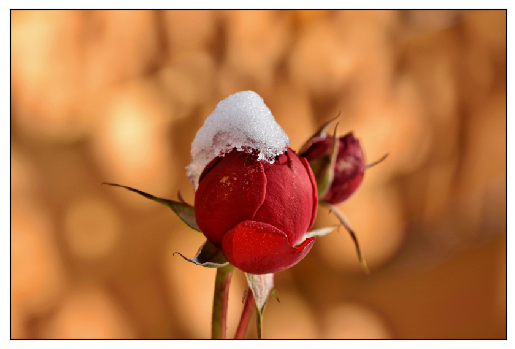

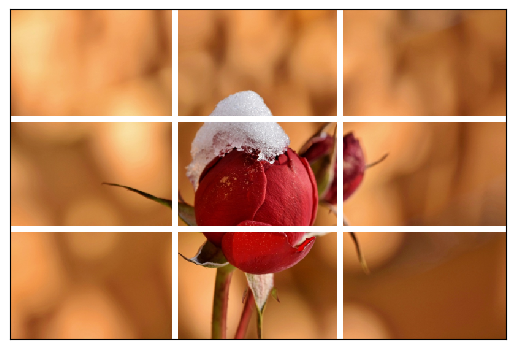

In [44]:
Image = cv2.imread("./images/frozen_rose.png")
print(f"Image Shape: {Image.shape}")

I_copy = Image.copy()

for i in range(I_copy.shape[0]):
    for j in range(264, 274):
        I_copy[i, j] = [255, 255, 255]
    for j in range(533, 543):
        I_copy[i,j] = [255, 255, 255]

for i in range(I_copy.shape[1]):
    for j in range(174, 184):
        I_copy[j, i] = [255, 255, 255]
    for j in range(353, 363):
        I_copy[j,i] = [255, 255, 255]

cv2.imshow("Image Frozen rose", Image)
cv2.imshow("Image Frozen ROSE (copy)", I_copy)
# cv2.imwrite('./images/frozen_rose_new.tif', I_copy)

Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
I_copy = cv2.cvtColor(I_copy, cv2.COLOR_BGR2RGB)

plt.imshow(Image, cmap='Greys', interpolation='nearest')

plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(I_copy, cmap='Greys', interpolation='nearest')

plt.xticks([]), plt.yticks([])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()
